# **TALLER 02 CALCULO DE RAICES**
## **Fecha:** 06/05/2025
## **Nombres:** 
- Christopher Criollo
- Joseph Jimenez

# **EJERCICIO 3** 

Dada la función $f(x) = \frac{\sin(x)}{x}$. ¿A partir de qué valor $x_T$ se cumple que $f(x) < 0.015,\ \forall x \geq x_T$?

El valor de x_T encontrado es: 18.5673
Las primeras 5 raíces positivas son: [3.141592653589793, 6.283185307179586, 9.42477796076938, 12.566370614359172, 15.707963267948966]


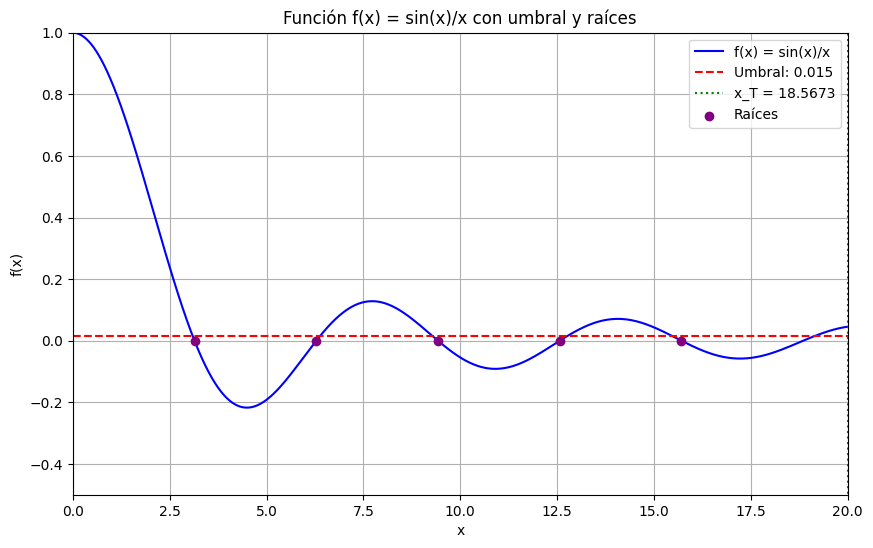

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

# Definición de la función
def f(x):
    return np.sin(x) / x

# Método de bisección
def bisection_method(func, target, a, b, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        c = (a + b) / 2
        fc = func(c)
        
        if abs(fc - target) < tol:
            return c
        
        if fc > target:
            a = c
        else:
            b = c
    return (a + b) / 2

target = 0.015
x_T = bisection_method(lambda x: abs(f(x)) - target, 0, 1, 20)

# Encontrar las primeras 5 raíces positivas
roots = []
for n in range(1, 6):
    root = bisection_method(f, 0, n*np.pi - np.pi/2, n*np.pi + np.pi/2)
    roots.append(root)

# Configuración de la gráfica
fig, ax = plt.subplots(figsize=(10, 6))
x_vals = np.linspace(0.1, 20, 1000)  # Evitamos x=0 por división por cero
y_vals = f(x_vals)

# Líneas iniciales
line, = ax.plot(x_vals, y_vals, 'b-', label='f(x) = sin(x)/x')
threshold_line = ax.axhline(y=target, color='r', linestyle='--', label=f'Umbral: {target}')
x_T_line = ax.axvline(x=x_T, color='g', linestyle=':', label=f'x_T = {x_T:.4f}')

# Puntos para las raíces
roots_scatter = ax.scatter([], [], color='purple', zorder=5, label='Raíces')

# Configuración del gráfico
ax.set_xlim(0, 20)
ax.set_ylim(-0.5, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Función f(x) = sin(x)/x con umbral y raíces')
ax.legend()
ax.grid(True)

# Función de animación
def update(frame):
    # Actualizar el punto de x_T
    if frame < len(x_vals):
        current_x = x_vals[frame]
        x_T_line.set_data([current_x, current_x], [-0.5, 1])
        
        # Mostrar raíces encontradas hasta ahora
        visible_roots = [r for r in roots if r <= current_x]
        if visible_roots:
            roots_scatter.set_offsets(np.column_stack((visible_roots, [0]*len(visible_roots))))
    
    return line, threshold_line, x_T_line, roots_scatter

# Crear animación
ani = FuncAnimation(fig, update, frames=len(x_vals), interval=20, blit=True)

# Guardar como GIF
ani.save('GraficaBiseccionE03.gif', writer='pillow', fps=30, dpi=100)

print(f"El valor de x_T encontrado es: {x_T:.4f}")
print(f"Las primeras 5 raíces positivas son: {roots}")